In [9]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # Suppresses INFO and WARNING messages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import imdb
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the IMDB dataset
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [3]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - acc: 0.5294 - loss: 0.6897 - val_acc: 0.6576 - val_loss: 0.6232
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - acc: 0.7667 - loss: 0.5115 - val_acc: 0.6366 - val_loss: 0.7760
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - acc: 0.8361 - loss: 0.3796 - val_acc: 0.8114 - val_loss: 0.4327
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - acc: 0.8909 - loss: 0.2728 - val_acc: 0.8094 - val_loss: 0.5023
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - acc: 0.9256 - loss: 0.2055 - val_acc: 0.8306 - val_loss: 0.4311
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - acc: 0.9570 - loss: 0.1250 - val_acc: 0.8288 - val_loss: 0.4468
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 228ms/step - acc: 0.9786 - loss: 0.0698 - val_acc: 0.8334 - val_loss: 0.5015
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - acc: 0.9880 - loss: 0.0456 - val_acc: 0.7782 - val_loss: 0.6806
Epoch 9/10
157/157 ━━━━━━━━━━━━━

In [4]:
score = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

782/782 - 29s - 37ms/step - acc: 0.8221 - loss: 0.6663
Test loss: 0.6663018465042114
Test accuracy: 0.8221200108528137


In [5]:
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()  # Convert predictions to labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12500
           1       0.82      0.82      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



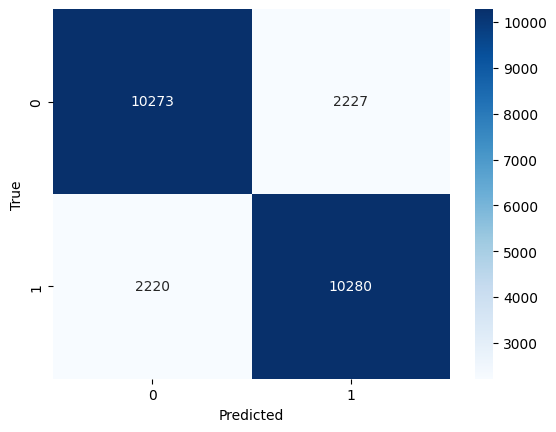

In [8]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()